# **TRAIN A CUSTOM OBJECT DETECTION WITH DISTANCE AND VOICE FEEDBACK**




# **we will be training our custom detector for object detection using YOLOv4-tiny and Darknet**


#**HOW TO BEGIN**?



*  Click on **Runtime** in the menu bar and click on **Change runtime type**. Select **GPU** and click on save.

# **1) Clone `darknet` git repository onto the Colab VM** 

In [1]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15460, done.
remote: Total 15460 (delta 0), reused 0 (delta 0), pack-reused 15460
Receiving objects: 100% (15460/15460), 14.05 MiB | 5.73 MiB/s, done.
Resolving deltas: 100% (10388/10388), done.


# **2) Create *`yolov4-tiny`* and *`training`* folders in your drive**

 Create a folder named ***yolov4-tiny*** in your drive. 
 
 Next, create another folder named ***training*** inside the ***yolov4-tiny*** folder. This is where we will save our trained weights (This path is mentioned in the obj.data file which we will upload later) 

# **3) Create & upload these files**

`What we need for training custom yolo detector`

a.   `Labeled Custom Dataset` 

b.   `Custom cfg file`

c.   `obj.data and obj.names files` 

d.   `process.py file (to create train.txt and test.txt files for training)`



## **3(a) Upload the Labeled custom dataset *`obj.zip`* file to the *`yolov4-tiny`* folder on your drive**


Create the zip file **obj.zip** from the **obj** folder containing both the input image ".jpg" files and their corresponding YOLO format labeled ".txt" files. 

Upload the zip file to the ***yolov4-tiny*** folder on your drive.



## **3(b) Create your custom *`config`* file and upload it to your drive**

Download the **yolov4-tiny-custom.cfg** file from ***darknet/cfg*** directory, make changes to it, and upload it to the ***yolov4-tiny*** folder on your drive .



**You need to make the following changes in your custom config file:**



*   change line batch to batch=64
*   change line subdivisions to subdivisions=16
*   change line max_batches to (classes*2000 but not less than number of training images, but not less than number of training images and not less than 18000), f.e. max_batches=18000 if you train for 9 classes
*    change line steps to 80% and 90% of max_batches, f.e. steps=14400,16200
*    set network size width=416 height=416 or any value multiple of 32
*    change line classes=9 to your number of objects in each of 2 [yolo]-layers
*    change [filters=255] to filters=(classes + 5)x3 in the 2 [convolutional] before each [yolo] layer, keep in mind that it only has to be the last [convolutional] before each of the [yolo] layers.
     So if classes=1 then it should be filters=18. If classes=9 then write filters=42.




## **3(c) Create your *`obj.data`* and *`obj.names`* files and upload them to your drive**

### **obj.data**



```
classes = 9
train  = data/train.txt
valid  = data/test.txt
names = data/obj.names
backup = /mydrive/yolov4-tiny/training

```



### **obj.names**


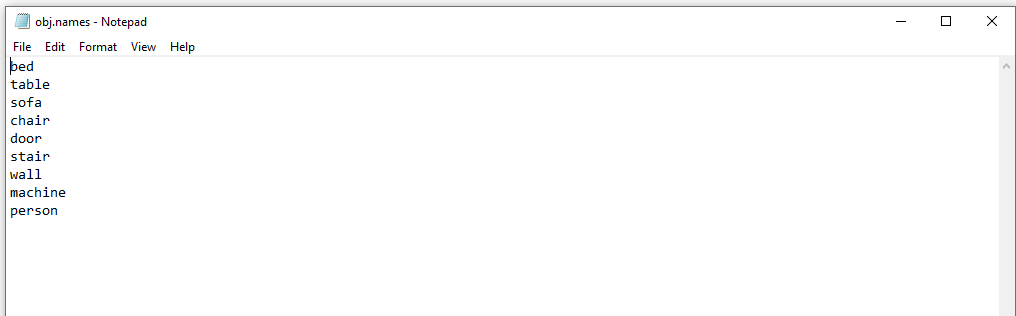


## **3(d) Upload the *`process.py`* script file to the *`yolov4-tiny`* folder on your drive**

**To divide all image files into 2 parts. 90% for train and 10% for test.**

This *process.py* script creates the files *train.txt* & *test.txt* where the *train.txt* file has paths to 90% of the images and *test.txt* has paths to 10% of the images.




# **4) Mount drive and link your folder**

In [2]:
#mount drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive

# list contents in yolov4-tiny folder in your drive
!ls /mydrive/yolov4-tiny

/
Mounted at /content/gdrive
obj.data  obj.names  obj.zip  process.py  training  yolov4-tiny-custom.cfg


# **5) Make changes in the `makefile` to enable OPENCV and GPU**

In [3]:
# change makefile to have GPU and OPENCV enabled
# also set CUDNN, CUDNN_HALF and LIBSO to 1

%cd /content/darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/darknet


# **6) Run `make` command to build darknet**

In [4]:
# build darknet 
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old ==

# **7) Copy files from your drive to the darknet directory**

In [5]:
# Clean the data and cfg folders first except the labels folder in data which is required

%cd data/
!find -maxdepth 1 -type f -exec rm -rf {} \;
%cd ..

%rm -rf cfg/
%mkdir cfg

/content/darknet/data
/content/darknet


In [6]:
#copy the datasets zip file to the root darknet folder
!cp /mydrive/yolov4-tiny/obj.zip ../

# unzip the datasets and their contents so that they are now in /darknet/data/ folder
!unzip ../obj.zip -d data/

Streaming output truncated to the last 5000 lines.
  inflating: data/obj/img28.jpg      
  inflating: data/obj/img28.txt      
  inflating: data/obj/img280.jpg     
  inflating: data/obj/img280.txt     
  inflating: data/obj/img2800.jpg    
  inflating: data/obj/img2800.txt    
  inflating: data/obj/img2801.jpg    
  inflating: data/obj/img2801.txt    
  inflating: data/obj/img2802.jpg    
  inflating: data/obj/img2802.txt    
  inflating: data/obj/img2803.jpg    
  inflating: data/obj/img2803.txt    
  inflating: data/obj/img2804.jpg    
  inflating: data/obj/img2804.txt    
  inflating: data/obj/img2805.jpg    
  inflating: data/obj/img2805.txt    
  inflating: data/obj/img2806.jpg    
  inflating: data/obj/img2806.txt    
  inflating: data/obj/img2807.jpg    
  inflating: data/obj/img2807.txt    
  inflating: data/obj/img2808.jpg    
  inflating: data/obj/img2808.txt    
  inflating: data/obj/img2809.jpg    
  inflating: data/obj/img2809.txt    
  inflating: data/obj/img281.jpg     

In [7]:
#copy the custom cfg file from the drive to the darknet/cfg folder
!cp /mydrive/yolov4-tiny/yolov4-tiny-custom.cfg ./cfg

In [8]:
# copy the obj.names and obj.data files so that they are now in /darknet/data/ folder
!cp /mydrive/yolov4-tiny/obj.names ./data
!cp /mydrive/yolov4-tiny/obj.data  ./data

In [9]:
#copy the process.py file from the drive to the darknet directory
!cp /mydrive/yolov4-tiny/process.py ./

# **8) Run the *`process.py`* python script to create the *`train.txt`* & *`test.txt`* files inside the *data* folder**

In [10]:
# run process.py ( this creates the train.txt and test.txt files in our darknet/data folder )
!python process.py

# list the contents of data folder to check if the train.txt and test.txt files have been created 
!ls data/

/content/darknet
labels	obj  obj.data  obj.names  test.txt  train.txt


## **To restart your training (In case the training does not finish and you get disconnected)**

If you get disconnected or lose your session, you don't have to start training your model from scratch again. You can restart training from where you left off. Use the weights that were saved last. The weights are saved every 100 iterations as ***yolov4-tiny-custom_last.weights*** in the ***yolov4-tiny/training*** folder on your drive. (The path we gave as backup in "obj.data" file). 

**Run steps 1,4,5,6,7,8 to restart training from the last saved checkpoint and run the following command:**


In [11]:
#to restart training your custom detector where you left off(using the weights that were saved last)
!./darknet detector train data/obj.data cfg/yolov4-tiny-custom.cfg /mydrive/yolov4-tiny/training/yolov4-tiny-custom_last.weights -dont_show -map

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 Prepare additional network for mAP calculation...
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64

**<u>Note</u>:** Since I am copying the files to the darknet dir inside the colab VM these files will get lost whenever you lose your session, so you will have to copy these files every time into the darknet dir inside colab VM using step 7.

**Check mAP (mean average precision)**

In [12]:
#You can check the mAP for all the saved weights to see which gives the best results ( xxxx here is the saved weight number like 4000, 5000 or 6000 snd so on )

!./darknet detector map data/obj.data cfg/yolov4-tiny-custom.cfg /mydrive/yolov4-tiny/training/yolov4-tiny-custom_best.weights -points 0

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	    

# **12) Test your custom Object Detector**


## **Make changes to your custom config file**
*   change line batch to batch=1
*   change line subdivisions to subdivisions=1

You can do it either manually or by simply running the code below

In [13]:
#set your custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-tiny-custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-tiny-custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


## **Run detector on a live webcam**

In [14]:
pip install gTTS


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
# Code from theAIGuysCode Github (https://github.com/theAIGuysCode/YOLOv4-Cloud-Tutorial/blob/master/yolov4_webcam.ipynb)
#adjusted for my custom YOLOv4-tiny trained weights, config and obj.data files

# import dependencies
from gtts import gTTS
from IPython.display import Audio
from IPython.display import display
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import matplotlib.pyplot as plt
%matplotlib inline
import gtts  
# from .engine import Engine
#from playsound import playsound


# import darknet functions to perform object detections
from darknet import *
# load in our YOLOv4 architecture network
network, class_names, class_colors = load_network("cfg/yolov4-tiny-custom.cfg", "data/obj.data", "/mydrive/yolov4-tiny/training/yolov4-tiny-custom_best.weights")
width = network_width(network)
height = network_height(network)

# darknet helper function to run detection on image
def darknet_helper(img, width, height):
  darknet_image = make_image(width, height, 3)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_resized = cv2.resize(img_rgb, (width, height),
                              interpolation=cv2.INTER_LINEAR)

  # get image ratios to convert bounding boxes to proper size
  img_height, img_width, _ = img.shape
  width_ratio = img_width/width
  height_ratio = img_height/height

  # run model on darknet style image to get detections
  copy_image_from_bytes(darknet_image, img_resized.tobytes())
  detections = detect_image(network, class_names, darknet_image)
  free_image(darknet_image)
  return detections, width_ratio, height_ratio

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes  

# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # call our darknet helper on video frame
    detections, width_ratio, height_ratio = darknet_helper(frame, width, height)

   # loop through detections and draw them on transparent overlay image
    for label, confidence, bbox in detections:
      print("Warning there is a ", label,confidence)
      # Providiong Audio signal After Detection:
      t1 = gtts.gTTS("Warning there is a " + label + feedback)
      t1.save("t1.mp3")
      tts = ("t1.mp3")                    #Provide the string to convert to speech
      w= Audio('t1.mp3',autoplay=True)    
      display(w)
      time.sleep(3)

      ## Distance Meaasurement for each bounding box
    left, top, right, bottom = bbox2points(bbox)
    left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
    bbox_array = cv2.rectangle(bbox_array, (left, top), (right, bottom), class_colors[label], 2)  
    bbox_array = cv2.putText(bbox_array, "{} [{:.2f}]".format(label, float(confidence)),
                              (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                              class_colors[label], 2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes   

    ## Distance Meaasurement for each bounding box
    #x, y, w, h = bboxes[0], bboxes[1], bboxes[2], bboxes[3]
    x, y, w, h = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
    distance = (2 * 3.14 * 180) / (w+ h * 360) * 1000 + 3 ### Distance measuring in Inch 
    #distance = ((2 * 3.14 * 180) / (w+ h * 360) * 1000 + 3)/12  ### Distance measuring in Inch
    feedback = ("{}".format(["Current Object"])+ " " +"is"+" at {} ".format(round(distance))+"Inches")
    #print(feedback)

<IPython.core.display.Javascript object>

Warning there is a  person 94.85


Warning there is a  person 96.17


Warning there is a  person 99.19
